In [1]:
NAME = "Saad Bin Ihsan"
COLLABORATORS = ""

---

# CS110 Assignment 3 - Trie trees

**Fell free to add more cells to the ones always provided in each question to expand your answers, as needed. Make sure to refer to the [CS110 course guide](https://drive.google.com/file/d/15qthc1zdBTcb7I0BhYjy0O0p186KwmG3/view?pli=1) on the grading guidelines, namely how many HC identifications and applications you are expected to include in each assignment.**

If you have any questions, do not hesitate to reach out to the TAs in the Slack channel "#cs110-algo", or come to one of your instructors' OHs.

### Submission Materials
Your assignment submission needs to include the following resources:
1. A PDF file must be the first resource and it will be created from the Jupyter notebook template provided in these instructions. Please make sure to use the same function names as the ones provided in the template. If your name is “Dumbledore”, your PDF should be named “Dumbledore.pdf”.
2. Your second resource must be a single Python/Jupyter Notebook named “Dumbledore.ipynb”. You can also submit a zip file that includes your Jupyter notebook, but please make sure to name it “Dumbledore.zip” (if your name is Dumbledore!).

For details on how to create a nice PDF from a Jupyter notebook, refer again to the [CS110 course guide](https://drive.google.com/file/d/15qthc1zdBTcb7I0BhYjy0O0p186KwmG3/view?pli=1).

### HCs and LOs for this assignment
[#responsibility], [#PythonProgramming], [#CodeReadability], [#DataStructures], [#ComplexityAnalysis], [#ComputationalCritique]

## Question 0

Take a screenshot of your CS110 dashboard on Forum where the following is visible:
* your name.
* your absences for the course have been set to excused up to the end of week 10 (inclusively).

This will be evidence that you have submitted acceptable pre-class and make-up work
for a CS110 session you may have missed. Check the specific CS110 make-up and
pre-class policies in the syllabus of the course.

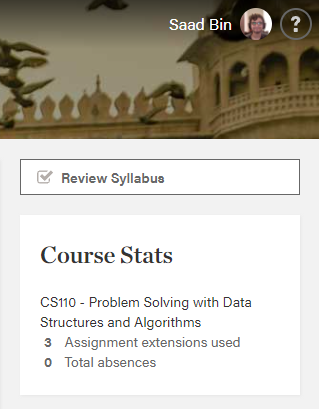

## Overview

Auto-completion functionalities are now ubiquitous in search engines, document editors, and messaging apps. How would you go about developing an algorithmic strategy from scratch to implement these computational solutions? In this assignment, you will learn about a new data structure and use it to build a very simple auto-complete engine. Each question in the assignment guides you closer to that objective while encouraging you to contrast this novel data structure to the other ones we have discussed in class.

A [trie tree](https://en.wikipedia.org/wiki/Trie), or a prefix tree, is a common data structure that stores a set of strings in a collection of nodes so that all strings with a common prefix are found in the same branch of the tree. Each node is associated with a letter, and as you traverse down the tree, you pick up more letters, eventually forming a word. Complete words are commonly found on the leaf nodes. However, some inner nodes can also mark full words.

Let’s use an example diagram to illustrate several important features of tries:

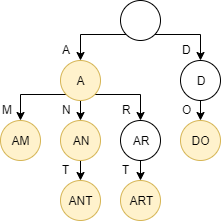

- Nodes that mark valid words are marked in yellow. Notice that while all leaves are considered valid words, only some inner nodes contain valid words, while some remain only prefixes to valid words appearing down the branch.

- The tree does not have to be balanced, and the height of different branches depends on its contents.

- In our implementation, branches never merge to show common suffixes (for example, both ANT and ART end in T, but these nodes are kept separate in their respective branches). However, this is a common first line of memory optimization for tries.

- The first node contains an empty string; it “holds the tree together.”

Your task in this assignment will be to implement a functional trie tree. You will be able to insert words into a dictionary, lookup valid and invalid words, print your dictionary in alphabetical order, and suggest appropriate suffixes like an auto-complete bot.

The assignment questions will guide you through these tasks one by one. To stay safe from breaking your own code, and to reinforce the idea of code versioning, under each new question first **copy your previous (working) code**, and only then **implement the new feature**. The code skeletons provided throughout will make this easier for you at the cost of repeating some large portions of code.

## Q1: Implement a trie tree

In this question, you will write Python code that can take a set/list/tuple of strings and insert them into a trie tree and lookup whether a specific word/string is present in the trie tree.

### Q1a: Theoretical pondering

Two main approaches to building trees, you might recall from class, are making separate Tree and Node classes, or only making a Node class. Which method do you think is a better fit for trie trees, and why? **Justify your reasoning in around 100 words.** You will use your chosen approach throughout the assignment, so don't rush this question.

Separating both classes makes it easier to work with the implementation in the form of a structure as a whole. This basically makes it so just instead of having just one class where every method that involves using the entire structure as a whole would be defined alongside the node structure itself. Separating the tree makes it so it's easier to identify the parts of code that are supposed to use the entire structure as a whole and the specific parts in the form of the nodes which have their own attributes.
This, as a result, makes the debugging a lot easier alongside making it easier to add future functionality to the data structure since separating the attributes for the nodes in a node class should allow for simple addition of further attributes.

### Q1b: Practical implementation

In the two cells below, there are two code skeletons. Depending on your answer to Q1a, either **implement a Node and a Trie class** or **implement a Node class**. Choose the corresponding code cell and delete the other one.

For your class(es), write **insert()** and **lookup()** methods, which will insert a word into the trie tree and look it up, respectively. Use the code skeleton and examine the specifications of its docstrings to guide you on the details of inputs and outputs to each method.

If you are coding two classes, your Trie should, upon initiation, create the root Node. If you are coding a single class, use an attribute to mark the root node.

Finally, make sure that the trie can be **initiated with a wordbank as an input**. This means that a user can create a trie and feed it an initial dictionary of words at the same time (like in the tests below), which will be automatically inserted into the trie upon its creation. Likely, this will mean that your \_\_init\_\_() has to make some calls to your insert() method.

Several test cases have been provided for your convenience and these include some, but not all, possible edge cases. If the implementation is correct, your code will pass all the tests. In addition, create at least **three more tests** to demonstrate that your code is working correctly and justify why such test cases are appropriate.

In [118]:
# VERSION 1 - Node + Trie classes

class Node:
    """
    This class represents one node of a trie tree.
    
    Since each node can have multiple children they will be initialized with an empty array for children where any chidren
        could be inserted. 
    Having a parent attribute would allow for easy connection of a letter in the trie back to the entire structure
    Data in this case refers to the letter that the Node would be initiated around
    isWord as a boolean that stores the property about each prefix being a valid word.
    
    Attributes
    ----------
    children (list): The child nodes that are connected to the node
    parent (Node): The parent node of the node being looked at
    data (string): The string associated with the node
    isWord (Boolean): Boolean showing whether the node is a valid word
    """

    def __init__(self, data):
        '''
        The constructor for Node class
        
        The parameters initiate the instances of the attributes for the node.
        '''
        self.children= []
        self.parent = None
        self.data = data
        self.isWord = False
        
    def __repr__(self):
        '''
        The string representation of the Node object'''
        
        return f"Node {self.data}"
class Trie:
    """This class represents the entirety of a trie tree.
    
    Attributes
    ----------
    word_list (list) : List of strings to be inserted into the trie upon creation.
    root (Node) : The root node of the Trie structure.
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    """
    
    def __init__(self, word_list = None):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        root (Node) : The root node of the Trie structure.  
        """
        
        self.word_list = word_list
        self.root = Node('')
        
        #Using a for loop over the initial provided word list, the Trie can be created by inserting all the words
        for word in word_list:
            self.insert(word)
    
    def insert(self, word):
        """Inserts a word into the trie, creating missing nodes on the go.
        
        Follows the methodology of inserting a Node in a similar manner to a BST, where it is first checked whether a node
        is in the children of preceding nodes until the point where it's not in the children is found and there, the letters
        corresponding to the nodes can be successively inserted.
        The method used also requires the separation of the nodes instantiated from the string they contain since every 
        instance of the node for one letter is different than the previous instance so comparison would require looking into
        at just the strings that the nodes contain.
        The strings of the nodes are used to determine the index where the node is present so that node could then be used as
        the next node to be looked at.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
        """
        #Standardising the format of the word
        if type(word) != str:
            return
        
        word = word.lower()
        
        
        current_node = self.root
        
        #For loop that goes over each letter in the word
        for letter in word:
            #Separating the Node and the string it contains
            current_letter = Node(letter)
            current_letter_string = current_letter.data
            
            #Looking for the current letter within the children (list made through list comprehension)
            if current_letter_string not in [child.data for child in current_node.children]:
                current_node.children.append(current_letter)
                index_of_letter = [child.data for child in current_node.children].index(current_letter_string)
                current_node = current_node.children[index_of_letter]
            else:
                index_of_letter = [child.data for child in current_node.children].index(current_letter_string)
                current_node = current_node.children[index_of_letter]
            #By only appending onto children when the letter isn't present, ensures travel within the Trie structure itself
            
        current_node.isWord = True #After the for loop goes over each letter in the word, the final letter contain the word
        
        
    def lookup(self, word):
        """Determines whether a given word is present in the trie.
        
        
        This uses much of the same process as with insert but instead of inserting a letter onto the children attribute when
        you don't find it there, it just immediately outputs False since that word isn't already within the structure. another
        change is that after the for loop, it ensures that the prefix's end is a valid word and only outputs True if it is.
        
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
            
        Notes
        -----
        Your trie should ignore whether a word is capitalized.
        E.g. trie.insert('Prague') should lead to trie.lookup('prague') = True
        """
        #standardizing the word being looked at
        if type(word) != str:
            return False
        word = word.lower()
        
        current_node = self.root
        
        for letter in word:
            current_letter = Node(letter)
            current_letter_string = current_letter.data
            if current_letter_string not in [child.data for child in current_node.children]:
                return False
            else:
                index_of_letter = [child.data for child in current_node.children].index(current_letter_string)
                current_node = current_node.children[index_of_letter]
        
        if current_node.isWord:
            return True
        else:
            return False

# Here are several tests that have been created for you.
# Remeber that the question asks you to provide several more,
# as well as to justify them.

# This is Namárië, JRRT's elvish poem written in Quenya
wordbank = "Ai! laurië lantar lassi súrinen, yéni unótimë ve rámar aldaron! Yéni ve lintë yuldar avánier mi oromardi lisse-miruvóreva Andúnë pella, Vardo tellumar nu luini yassen tintilar i eleni ómaryo airetári-lírinen. Sí man i yulma nin enquantuva? An sí Tintallë Varda Oiolossëo ve fanyar máryat Elentári ortanë, ar ilyë tier undulávë lumbulë; ar sindanóriello caita mornië i falmalinnar imbë met, ar hísië untúpa Calaciryo míri oialë. Sí vanwa ná, Rómello vanwa, Valimar! Namárië! Nai hiruvalyë Valimar. Nai elyë hiruva. Namárië!".replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").split()

# wordbank = ['oiolossëo']

trie = Trie(wordbank)
# be careful about capital letters!
assert trie.lookup('oiolossëo') == True
# this is a prefix, but also a word in itself
assert trie.lookup('an') == True
# this is a prefix, but NOT a word
assert trie.lookup('ele') == False
# not in the wordbank
assert trie.lookup('Mithrandir') == False

# Note: There are several ways in which we can condense the text cleaning syntax, 
# without repeating the method replace() multiple times, 
# but we are leaving it this way for clarity.

In [123]:
test1 = []

# testing for an empty array is important since in this case, we shouldn't be getting any hits for lookups

trie = Trie(test1)

assert trie.lookup('test') == False
assert trie.lookup('') == False


test2 = ['']

# testing to enter an empty string is able to check for whether the base case of just the root node being there works for the
# Trie

trie = Trie(test2)

assert trie.lookup('') == True
assert trie.lookup('test') == False

test3 = ['cat','dog']

# Since the capitilization of a word doesn't matter, we should get the same results with words in any capitilization style

trie = Trie(test3)

assert trie.lookup('CAT') == True
assert trie.lookup('dOG') == True


test4 = [1,2,3,4,5,6,7,8,9]

#This test case accounts for all inputs that are not words(string) which would not be accepted into the tree structure

trie = Trie(test4)

assert trie.lookup(1) == False

test5 = ['1','2','3','4','5']

#Since the parsing for the data is being done by us beforehand, any string should be a valid input for the trie and thus, it
#should be able to search for anything in string form

trie = Trie(test5)

assert trie.lookup('1') == True

test6 = [")(&%#@$@!---+++===-*/`~/.,:'}{}')"]

#Since the parsing for the data is being done by us beforehand, any string should be a valid input for the trie and thus, it
#should be able to search for anything in string form

trie = Trie(test6)

assert trie.lookup(")(&%#@$@!---+++===-*/`~/.,:'}{}')") == True

In [0]:
# YOUR NEW TESTS HERE

The tests I have used are appropriate because they try to break the program by looking at edge cases which may not have been accounted for. This includes inputs in the form of an empty list, which would not have any words and thus nothing to search for.

Only an empty string is helpful because it helps to identify the bounds that the nodes can exist within and if it is a valid string (which it is) than you should be able to search for it and find it in the trie.

Checking for the capitilization scenario accounts for nonstandardized inputs still working as long as they are valid strings

Checking for data types other than numbers allows to check for the incorrect scenarios where those datatypes cannot be stored in the trie and the resulting lookups should be impossible which I've shown

Checking for the same aspect but in the form of a string is valuable because it shows that the conditions for the code are being bound by the fact that the inputs must be a string and nothing more.

Finally, searching for an extremely complicated set of symbols within a string package should also be able to return true which is shown.

## Q2: The computational complexity of tries

Evaluate the **computational complexity of the insert() and lookup()** methods in a trie. What are the relevant variables for runtime? You might want to consider how the height of a trie is computed to start addressing this question.  Make sure to clearly explain your reasoning.

**Compare your results to** the runtime of the same operations on **a BST**. Can you think of specific circumstances where the practical runtimes of operations supported by tries are higher than for BSTs? Explain your answer. If you believe such circumstances could be common, why would someone even bother implementing a trie tree?

Looking at the code for the lookup method, we can see the complexity for each individual line to derive a relation on the basis of the word.

    word = word.lower()                                                                                     O(1)
    
    current_node = self.root                                                                                O(1)

    for letter in word:                                                                                     O(n)
        current_letter = Node(letter)                                                                       O(1)
        current_letter_string = current_letter.data
        if current_letter_string not in [child.data for child in current_node.children]:                    O(1) 
            return False                                                                                    O(1)
        else:
            index_of_letter = [child.data for child in current_node.children].index(current_letter_string)  O(1)
            current_node = current_node.children[index_of_letter]                                           O(1)

    if current_node.isWord:                                                                                 O(1)
        return True                                                                                         O(1)
    else:
        return False                                                                                        O(1)
        
        
Looking through this we can see that the complexity will be 
O(1) + O(1) + O(n)(O(1) + O(1) + O(1) + O(1) + O(1)) + O(1) + O(1) + O(1) 

This tells us that the lookup method is at most O(n) where n is the length of the word. However, if we look there's also the caveat which is identifying whether a letter exists within the children of a current node, since at that point, a node can have anywhere between 0 and a number of children equal to the allow letters (a constant), the number of comparisons that would be needed to be done would be bounded by the constant at every level which would still be O(n).

Since the lookup is in this case a special implementation of the insert method with no additional or fewer loops that would affect the complexity, the overarching time complexity will be the same. However the space complexity might be different because lookup does not add anything into the existing Trie structure whereas an insert will. This means that within any possibility the space complexity of lookup itself will be O(1) whereas it will be O(n) for storing the n letters in the structure for insert.

In comparison to operations on a BST, the runtime of these operations are dependent on the length of the word being inputted into the Trie. On the other hand, a BST needs to compare across the height of the tree to both insert and lookup and is thus dependent upon O(h).

In practical scenarios, A trie will almost always take more time since instead of just having two children, each node can have a number of children which is only bound by the number of valid characters. This means that across each level, instead of having to compare across just two values as in a binary search tree, you would potentially have to compare across all the characters at each level. And even if we don't have the maximum, there's a very high chance of having more than 2 children which would automatically become worse than a BST.
However, looking at this specific implementation for words and literature, it would be impossible to achieve the same functionality within a BST since it isn't able to store all the amount of data required.


## Q3: Print a dictionary in alphabetical order.

Recall the meaning of pre-order traversal from your previous classes. On the data structure of a trie tree, pre-order traversal corresponds to an alphabetically sorted list of the words contained within (provided that your node children are sorted alphabetically).

For example, on the example trie given in the introduction, pre-order traversal would return ["A", "AM, "AN", "ANT", "AR, "ART, "D" and "DO"]. However, since we are only interested in the actual words, we would not include "D" and "AR" in our list. To that end, you will need to include an attribute for each node, storing the information about whether its content is a word or not.

Copy your existing code to the code skeleton cell below, and add a new method to it, **alphabetical_list()**. This will be version two of your autocomplete script.

The method should **return a list**, whose elements will be the words contained in the tree, in alphabetical order. On top of passing the provided test, write at least **three more tests**, and explain why they are appropriate.

**Approach choice:** Remember the two possible approaches to the problem, as we’ve seen at the start of the course: iterative or recursive. Depending on your trie implementation, one might be preferred over the other. **Justify your choice of approach** in a few sentences (~100 words).

Copy-paste your previous code and make adjustments to this "new version", so that you cannot break the old one :).

*(Notes: If you choose a recursive approach, it might be useful to implement a helper method that is not called by the user but by preorder_traversal(). Also, watch out for the [unintuitive Python behaviour](https://web.archive.org/web/20200221224620/http://effbot.org/zone/default-values.htm) if defining functions with mutable default parameter values.)*

In [128]:

class Node:

    def __init__(self, data, parent = None):
        self.children= []
        self.parent = parent
        self.data = data
        self.isWord = False
    
    def __repr__(self):
        return f"Node {self.data}"
        
class Trie:
    '''
    Same implementation of the structure as above except with the addition of the alphabetical list method
    
    Methods:
        alphabetical_list(self): Prints out the words in the Trie structure in alphabetical order

    '''
    def __init__(self, word_list = None):
        self.word_list = word_list
        self.root = Node('')
        
        for word in word_list:
            self.insert(word)
    
    def insert(self, word):
        '''
        In order to account for the alphabetical nature of printing out the nodes, the children were initially being stored in
        a sporadic way so by sorting the list on the basis of the letters in the children list allows for the children to be
        maintained alphabetically.
        '''
        
        word = word.lower()
        
        current_node = self.root
        
        for letter in word:
            current_letter = Node(letter, parent = current_node)
            current_letter_string = current_letter.data
            
            if current_letter_string not in [child.data for child in current_node.children]:
                current_node.children.append(current_letter)
                
                #This addition sorts using the sorted function in python using the anonymous lambda function as a parameter
                # which just calls on to the letters of the nodes to be used as a basis for sorting
                current_node.children = sorted(current_node.children, key = lambda x: x.data)
  
                index_of_letter = [child.data for child in current_node.children].index(current_letter_string)
                current_node = current_node.children[index_of_letter]
            else:
                index_of_letter = [child.data for child in current_node.children].index(current_letter_string)
                current_node = current_node.children[index_of_letter]
        current_node.isWord = True
        
        
    def lookup(self, word):
        word = word.lower()
        
        current_node = self.root
        
        for letter in word:
            current_letter = Node(letter)
            current_letter_string = current_letter.data
            if current_letter_string not in [child.data for child in current_node.children]:
                return False
            else:
                index_of_letter = [child.data for child in current_node.children].index(current_letter_string)
                current_node = current_node.children[index_of_letter]
        
        if current_node.isWord:
            return True
        else:
            return False
        
        
        
    def alphabetical_list(self):
        """Delivers the content of the trie in alphabetical order.

        This method utilizes the preorder traversel technique we studied for printing a sorted list within BSTs. 
        
        Helper methods:
        create_iterative_word(Node): This takes inputs in the form of a node and iteratively goes up to the root of the Trie to
        deconstruct the word associated with that node
        sub_preorder(Node): Recursively goes through the leftmost children of a node
        
        Returns
        ----------
        list
            List of strings, all words from the trie in alphabetical order.
        """
        
        if not self.root: 
            return []
        lst = []
        root = self.root
        
        def create_iterative_word(final_letter):
            '''
            Creating the helper method to use in creating the words.
            Does it by adding on to an empty string the parent nodes of the of node until it gets to the root.
            
            Returns
            --------
            string
                string built from the final letter of the string
            '''
            final_string = ''
            
            current_node = final_letter
            
            while current_node.parent is not None:
                final_string += current_node.data
                current_node = current_node.parent
            
            #Using list slicing to get the string in reversed order since the letters are added from end to beginning
            return final_string[::-1]
            
        
        def sub_preorder(root):
            '''
            This helper function recursively goes through the left children. For each node it encounters, it checks to see
            whether it is the final letter for a valid word and if it is, appends it to a master list.
            '''
            
            if root is not None:

                if root.isWord:
                    lst.append(create_iterative_word(root))                
                
                for child in root.children:
                    sub_preorder(child)
              
        sub_preorder(root)
        
        return lst


In [129]:
# intiate the test by uncommenting one of the lines below, depending on your approach

wordbank = "Lorem ipsum dolor sit amet, consectetuer adipiscing elit. Duis pulvinar. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos hymenaeos. Nunc dapibus tortor vel mi dapibus sollicitudin. Etiam quis quam. Curabitur ligula sapien, pulvinar a vestibulum quis, facilisis vel sapien.".replace(",", "").replace(".", "").split()

trie = Trie(wordbank)

assert trie.alphabetical_list() == ['a','ad','adipiscing','amet','aptent',
                                    'class','consectetuer','conubia',
                                    'curabitur','dapibus','dolor','duis',
                                    'elit','etiam','facilisis','hymenaeos',
                                    'inceptos','ipsum','ligula','litora',
                                    'lorem','mi','nostra','nunc','per',
                                    'pulvinar','quam','quis','sapien',
                                    'sit','sociosqu','sollicitudin','taciti',
                                    'torquent','tortor','vel','vestibulum']


In [141]:
import string

#Looking at the list of alphabets in order to see if it goes through them all in order

alphabets = [letter for letter in string.ascii_lowercase]

trie = Trie(alphabets)

assert trie.alphabetical_list() == alphabets


#Looking at the reversed list of alphabets

alphabets_reversed = sorted(alphabets, reverse=True)

trie = Trie(alphabets_reversed)

assert trie.alphabetical_list() == alphabets


#repititions
repititions = ["ten", "ten", "ten", "ten", "ten"]
trie2 = Trie(repititions)
repititions_removed = sorted(set(repititions))
assert trie2.alphabetical_list() == repititions_removed




Between recursive and iterative, I decided to use the recursive implementation to go through to the next node levels within the Trie structure but to do the same process on to all the chilren, I iteratively went over the list of children to call the same function. This made the process more intuitive to understand since at each point, I would be alphabetically going over the first child until I get to the first most child which would be first item in the alphabetical list.

## Q4: Find the k most common words in a speech.

To mathematically determine the overall connotation of a speech, you might want to compute which words are most frequently used and then run a [sentiment analysis](https://en.wikipedia.org/wiki/Sentiment_analysis). To this end, add a method to your code, **k_most_common()** that will take as an input k, an integer, and return a list of the k most common words from the dictionary within the trie. The structure of the output list should be such that each entry is a tuple, the first element being the word and the second an integer of its frequency (see docstring if you’re confused).

To complete this exercise, you don’t have to bother with resolving ties (for example, if k = 1, but there are two most common words with the same frequency, you can return either of them), but consider it an extra challenge and let us know if you believe you managed to solve it.

The test cell below downloads and preprocesses several real-world speeches, and then runs the k-most-common word analysis of them; your code should pass the tests. As usual, add at least **three more tests**, and justify why they are relevant to your code (feel free to find more speeches to start analysing too!).

Again, copy-paste your previous code and make adjustments to this "new version". The first cell has been locked to stop you from accidentally deleting the docstrings.

Completing this question well will help you to tackle Q5!

*(Hint: This task will probably require your nodes to store more information about the frequency of words inserted into the tree. One data structure that might be very useful to tackle the problem of traversing the tree and finding most common words is heaps — you are allowed to use the heapq library or another alternative for this task.)*

In [138]:

import string

class Node:
    '''
    Same implementation as above except for the addition of an attribute that accounts for how many times a word has been
    repeated
    
    Attributes:
    count(int) - Integer corresponding to the frequency of the word in a word list
    '''
    
    
    def __init__(self, data, parent = None):
        '''
        Parameters
        ----------
        count(int) - Integer corresponding to the frequency of the word in Trie structure
        '''
        self.children= []
        self.parent = parent
        self.data = data
        self.isWord = False
        self.count = 0
    
    def __repr__(self):
        return f"Node {self.data}"
        
class Trie:
    '''
    For this implementation I decided to add a separate dictionary that keeps track of how many times a word has been
    repeated and use that dictionary as a base to calculate and sort throught the words in a list.
    
    Attributes:
    
    word_count_dict (dictionary): with keys as the ending nodes for the words and values as amount of times that word has
                                  been repeated, is able to keep track of the entire word list frequency.
    '''
    
    
    def __init__(self, word_list = None):
        '''
        Adding the word_count_dict into the attribute of the Trie
        
        Parameters:
        word_count_dict (dictionary): with keys as the ending nodes for the words and values as amount of times that word has
                                      been repeated, is able to keep track of the entire word list frequency.
        '''
        
        self.word_list = word_list
        self.root = Node('')
        self.word_count_dict = {}
        
        
        for word in word_list:
            self.insert(word)
    
    def insert(self, word):
        '''
        To account for the words needed to be counted alongside, the insert method needs to be changed to continously allow for
        the same word to be used as a basis to update the counter of that node.
        '''
        
        word = word.lower()
        
        current_node = self.root
        
        
        for letter in word:
            current_letter = Node(letter, parent = current_node)
            current_letter_string = current_letter.data
            
            if current_letter_string not in [child.data for child in current_node.children]:
                current_node.children.append(current_letter)
                current_node.children = sorted(current_node.children, key = lambda x: x.data)
                index_of_letter = [child.data for child in current_node.children].index(current_letter_string)
                current_node = current_node.children[index_of_letter]
            else:
                index_of_letter = [child.data for child in current_node.children].index(current_letter_string)
                current_node = current_node.children[index_of_letter]
                
        
        #In this additional part, by checking to see if the node is already a word, we can identify repetition and add to
        #the counter in the dictionary
        if current_node.isWord:
            self.word_count_dict[current_node] += 1
        else:
        #This accounts for the base case of a new word and sets its count to 1    
            current_node.isWord = True
            self.word_count_dict[current_node] = 1
        
        
    def lookup(self, word):
        word = word.lower()
        
        current_node = self.root
        
        for letter in word:
            current_letter = Node(letter)
            current_letter_string = current_letter.data
            if current_letter_string not in [child.data for child in current_node.children]:
                return False
            else:
                index_of_letter = [child.data for child in current_node.children].index(current_letter_string)
                current_node = current_node.children[index_of_letter]
        
        if current_node.isWord:
            return True
        else:
            return False

    def k_most_common(self, k):
        """Finds k words inserted into the trie most often.

        This function sorts for the entire tree's words on the basis of their counts in reverse order and then uses list slicing
        get the k most common words
        
        Parameters
        ----------
        k : int
            Number of most common words to be returned.

        Returns
        ----------
        list
            List of tuples.

            Each tuple entry consists of the word and its frequency.
            The entries are sorted by frequency.

        Example
        -------
        >>> print(trie.k_most_common(3))
        [(‘the’, 154), (‘a’, 122), (‘i’, 122)]

        I.e. the word ‘the’ has appeared 154 times in the inserted text.
        The second and third most common words both appeared 122 times.
        """
        #Initializing dummy lists to be used 
        interim_list = []
        final_list = []
        
        #Since the dictionary keys contain all the words, creating a sorted list on the basis of the values associated with 
        #the keys allows us to get a list of words completely sorted in terms of their frequencies
        sorted_by_commonality = sorted(self.word_count_dict.keys(), key = lambda x : self.word_count_dict[x], reverse = True)
        
        #List slicing to only look at the k most common words
        if k > len(sorted_by_commonality):
            k = len(sorted_by_commonality)
        for word in sorted_by_commonality[:k]:
            interim_list.append(word)
        
        #In order to preserve the alphabetical nature of the final word list, the interim list is first sorted with respect to
        # the first letter in the words they represent and then resorted in terms of the frequencies
        
        interim_list = sorted(interim_list, key = lambda x : self.create_iterative_word(x)[0])
        interim_list = sorted(interim_list, key = lambda x : self.word_count_dict[x], reverse = True)
        
        #iteratively adds tuples of the word using the word creating function and the values associated in the dictionary
        for word in interim_list:
            final_list.append((self.create_iterative_word(word),self.word_count_dict[word]))
        return final_list

    def create_iterative_word(self, final_letter):
        
        final_string = ''

        current_node = final_letter

        while current_node.parent is not None:
            final_string += current_node.data
            current_node = current_node.parent

        return final_string[::-1]
    
    def alphabetical_list(self):
        
        if not self.root: 
            return []
        lst = []
        root = self.root
        
        def create_iterative_word(final_letter):
            
            final_string = ''
            
            current_node = final_letter
            
            while current_node.parent is not None:
                final_string += current_node.data
                current_node = current_node.parent
            
            return final_string[::-1]
            
        
        def sub_inorder(root):
            if root is not None:

                if root.isWord:
                    lst.append(create_iterative_word(root))                
                
                for child in root.children:
                    sub_inorder(child)
                
        sub_inorder(root)
        
        return lst

    


In [139]:
# depending on your choice of approach, 
# uncomment one of the lines in the for loop to initiate the test

# you might have to run 'pip install requests' before running this cell 
# since you're downloading data from an online resource 
# please note this might take a while to run

# Mehreen Faruqi - Black Lives Matter in Australia: https://bit.ly/CS110-Faruqi
# John F. Kennedy - The decision to go to the Moon: https://bit.ly/CS110-Kennedy
# Martin Luther King Jr. - I have a dream: https://bit.ly/CS110-King
# Greta Thunberg - UN Climate Summit message: https://bit.ly/CS110-Thunberg
# Vaclav Havel - Address to US Congress after the fall of Soviet Union: https://bit.ly/CS110-Havel

from requests import get
speakers = ['Faruqi', 'Kennedy', 'King', 'Thunberg', 'Havel']
bad_chars = [';', ',', '.', '?', '!', '_', 
             '[', ']', ':', '“', '”', '"', '–', '-']

for speaker in speakers:
    
    # download and clean up the speech from extra characters
    speech_full = get(f'https://bit.ly/CS110-{speaker}').text
    just_text = ''.join(c for c in speech_full if c not in bad_chars)
    without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in just_text)
    just_words = [word for word in without_newlines.split(" ") if word != ""]
    
    trie = Trie(just_words)
    # trie = Node(just_words)
    
    if speaker == 'Faruqi':
        Faruqi = [('the', 60), ('and', 45), ('to', 39), ('in', 37), 
                  ('of', 34), ('is', 25), ('that', 22), ('this', 21), 
                  ('a', 20), ('people', 20), ('has', 14), ('are', 13), 
                  ('for', 13), ('we', 13), ('have', 12), ('racism', 12), 
                  ('black', 11), ('justice', 9), ('lives', 9), ('police', 9)]
        assert trie.k_most_common(20) == Faruqi
    
    elif speaker == 'Kennedy':
        Kennedy = [('the', 117), ('and', 109), ('of', 93), ('to', 63), 
                   ('this', 44), ('in', 43), ('we', 43), ('a', 39), 
                   ('be', 30), ('for', 27), ('that', 27), ('as', 26), 
                   ('it', 24), ('will', 24), ('new', 22), ('space', 22), 
                   ('is', 21), ('all', 15), ('are', 15), ('have', 15), ('our', 15)]
        assert trie.k_most_common(21) == Kennedy
    
    elif speaker == 'Havel':
        Havel = [('the', 34), ('of', 23), ('and', 20), ('to', 15), 
                 ('in', 13), ('a', 12), ('that', 12), ('are', 9), 
                 ('we', 9), ('have', 8), ('human', 8), ('is', 8), 
                 ('you', 8), ('as', 7), ('for', 7), ('has', 7), ('this', 7), 
                 ('be', 6), ('it', 6), ('my', 6), ('our', 6), ('world', 6)]
        assert trie.k_most_common(22) == Havel
    
    elif speaker == 'King':
        King = [('the', 103), ('of', 99), ('to', 59), ('and', 54), ('a', 37), 
                ('be', 33), ('we', 29), ('will', 27), ('that', 24), ('is', 23), 
                ('in', 22), ('as', 20), ('freedom', 20), ('this', 20), 
                ('from', 18), ('have', 17), ('our', 17), ('with', 16), 
                ('i', 15), ('let', 13), ('negro', 13), ('not', 13), ('one', 13)]
        assert trie.k_most_common(23) == King
    
    elif speaker == 'Thunberg':
        Thunberg = [('you', 22), ('the', 20), ('and', 16), ('of', 15), 
                    ('to', 14), ('are', 10), ('is', 9), ('that', 9), 
                    ('be', 8), ('not', 7), ('with', 7), ('i', 6), 
                    ('in', 6), ('us', 6), ('a', 5), ('how', 5), ('on', 5), 
                    ('we', 5), ('all', 4), ('dare', 4), ('here', 4), 
                    ('my', 4), ('people', 4), ('will', 4)]
        assert trie.k_most_common(24) == Thunberg
        
# Note: There are cleaner and more concise ways to write the code above, 
# but this way it should be easily understandable.

In [140]:

from requests import get
speakers = ['Faruqi', 'Kennedy', 'King', 'Thunberg', 'Havel']
bad_chars = [';', ',', '.', '?', '!', '_', 
             '[', ']', ':', '“', '”', '"', '–', '-', ' ']

for speaker in speakers:
    
    # download and clean up the speech from extra characters
    speech_full = get(f'https://bit.ly/CS110-{speaker}').text
    just_text = ''.join(c for c in speech_full if c not in bad_chars)
    without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in just_text)
    just_words = [word for word in without_newlines.split(" ") if word != ""]
    
    trie = Trie(just_words)
    # trie = Node(just_words)
    
    if speaker == 'Faruqi':

        print(trie.k_most_common(0))
        print(trie.k_most_common(100))
        print(trie.k_most_common(1000))

[]
[('the', 60), ('and', 45), ('to', 39), ('in', 37), ('of', 34), ('is', 25), ('that', 22), ('this', 21), ('a', 20), ('people', 20), ('has', 14), ('are', 13), ('for', 13), ('we', 13), ('have', 12), ('racism', 12), ('black', 11), ('justice', 9), ('lives', 9), ('police', 9), ('about', 8), ('on', 8), ('been', 7), ('country', 7), ('indigenous', 7), ('it', 7), ('matter', 7), ('our', 7), ('other', 7), ('who', 7), ('at', 6), ('as', 6), ('australia', 6), ('be', 6), ('custody', 6), ('i', 6), ('last', 6), ('not', 6), ('there', 6), ('all', 5), ('by', 5), ('but', 5), ('deaths', 5), ('from', 5), ('institutional', 5), ('over', 5), ('rallies', 5), ('should', 5), ('system', 5), ('violence', 5), ('with', 5), ('against', 4), ('an', 4), ("can't", 4), ('great', 4), ('happening', 4), ("it's", 4), ('if', 4), ('many', 4), ('much', 4), ('systemic', 4), ('so', 4), ('was', 4), ('week', 4), ('way', 4), ('aboriginal', 3), ('australians', 3), ('being', 3), ('conversations', 3), ('changes', 3), ('community', 3), ('

KeyboardInterrupt: 

YOUR ANSWER HERE

## Q5: Implement an autocomplete with a Shakespearean dictionary!

Your task is to create a new **autocomplete()** method for your class, which will take a string as an input, and return another string as an output. If the string is not present in the tree, the output will be the same as the input. However, if the string is present in the tree, your task is to find the most common word to which it is a prefix and return that word instead (this can still turn out to be itself).

To make the task more interesting, use the test cell code to download and parse “The Complete Works of William Shakespeare”, and insert them into a trie. Your autocomplete should then pass the following tests. As usual, add at least **three more test cases**, and explain why they are appropriate (you can use input other than Shakespeare for them).

Make sure to include a minimum **100 word-summary critically evaluating** your autocomplete engine. How does it really work? Your critical reflection needs to specifically evaluate the role of the different data structures used by their algorithm and what is the overall complexity that the algorithm offers. Can we do better? If so, how and by how much?

*(Hint: Again, depending on how you choose to implement it, your autocomplete() might make calls to other helper methods. However, make sure that autocomplete() is the method exposed to the user in order to pass the tests.)*

*This is a thoroughly frequentist approach to the problem, which is not the only method, and in many cases not the ideal method. However, if you were tasked with implementing something like [this](https://jqueryui.com/autocomplete/) or [this](https://xdsoft.net/jqplugins/autocomplete/), it might just be enough, so let’s give it a go. Good luck!*

In [101]:

import string

class MaxHeapq():
    '''
    A modified version of the Max Heap we discussed in class that uses the values of the words in the form of their 
    frequencies from an inputted dictionary to constantly create a max heap
    
    Attributes
    ----------
    heap(list): stores the list associated with the heap
    heap_size(int): stores the size of the heap
    value_dict(dictionary): Dictionary containing the key : value pairs for each of the words being used that stores the
    frequencies of the words alongside
    
    '''
    
    
    def __init__(self, value_dict):    
        '''
        Constructor for the MaxHeapq class
        
        It initializes a dummy into the dictionary to use as a base comparison for when an element gets added
        '''
   
        self.heap       = []
        self.heap_size  = 0
        self.value_dict = value_dict
        self.value_dict['dummy'] = -float('inf')
        
    def left(self, i):

        return 2 * i + 1

    def right(self, i):

        return 2 * i + 2
		
    def parent(self, i):

        return (i - 1)//2

    def maxk(self):     

        return self.heap[0]     
    
  
    def heappush(self, key):  
        
        self.heap.append('dummy')
        self.increase_key(self.heap_size,key)
        self.heap_size+=1
        
    def increase_key(self, i, key): 
        '''
        The comparisons between the values done by using the value of the node in the dictionary its contained in. Otherwise,
        the process for maintaining the heap invariant stays the same
        '''

        if self.value_dict[key] < self.value_dict[self.heap[i]]:
            raise ValueError('new key is smaller than the current key')
        self.heap[i] = key
        while i > 0 and self.value_dict[self.heap[self.parent(i)]] < self.value_dict[self.heap[i]]:
            j = self.parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            i = j    
            #This part could be more efficient by swapping in one line but I'm not sure whether I should change this
       
    def heapify(self, i):
        '''
        The same as before but instead utlizing dictionary values for the nodes
        '''
        l = self.left(i)
        r = self.right(i)
        heap = self.heap
        if l <= (self.heap_size-1) and self.value_dict[heap[l]]>self.value_dict[heap[i]]:
            largest = l
        else:
            largest = i
        if r <= (self.heap_size-1) and self.value_dict[heap[r]] > self.value_dict[heap[largest]]:
            largest = r
        if largest != i:
            heap[i], heap[largest] = heap[largest], heap[i]
            self.heapify(largest)
            
    def build_max_heap(self):

        for i in range(self.heap_size//2,-1,-1):
            self.heapify(i)

    def heappop(self):
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')
        maxk = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size-=1
        self.heapify(0)
        return maxk 

class Node:
    '''
    This class is implemented in the same method as before
    '''
    def __init__(self, data, parent = None):
        self.children= []
        self.parent = parent
        self.data = data
        self.isWord = False
        self.count = 0
    
    def __repr__(self):
        return f"Node {self.data}"
        
class Trie:
    '''
    To implement the autocomplete dictionary, which only looks for the maximum of the next most common word, a heap has been 
    used as a strategy to easily maintain the heap invariant with lower time complexity as compared to sorting.
    
    Methods
    -------
    autocomplete(self, prefix)
        Returns the most common word following the prefix given from the Trie
    
    '''
    
    
    def __init__(self, word_list = None):
        self.word_list = word_list
        self.root = Node('')
        self.word_count_dict = {}
        
        
        for word in word_list:
            self.insert(word)

    
    def insert(self, word):
        word = word.lower()
        
        current_node = self.root
        
        for letter in word:
            current_letter = Node(letter, parent = current_node)
            current_letter_string = current_letter.data
            
            if current_letter_string not in [child.data for child in current_node.children]:
                current_node.children.append(current_letter)
                current_node.children = sorted(current_node.children, key = lambda x: x.data)
                index_of_letter = [child.data for child in current_node.children].index(current_letter_string)
                current_node = current_node.children[index_of_letter]
            else:
                index_of_letter = [child.data for child in current_node.children].index(current_letter_string)
                current_node = current_node.children[index_of_letter]
        if current_node.isWord:
            self.word_count_dict[current_node] += 1
        else:
            current_node.isWord = True
            self.word_count_dict[current_node] = 1
        
    def lookup(self, word):
        word = word.lower()
        
        current_node = self.root
        
        for letter in word:
            current_letter = Node(letter)
            current_letter_string = current_letter.data
            if current_letter_string not in [child.data for child in current_node.children]:
                return False
            else:
                index_of_letter = [child.data for child in current_node.children].index(current_letter_string)
                current_node = current_node.children[index_of_letter]
        
        if current_node.isWord:
            return True
        else:
            return False

    def k_most_common(self, k):
        
        interim_list = []
        final_list = []
        sorted_by_commonality = sorted(self.word_count_dict.keys(), key = lambda x : self.word_count_dict[x], reverse = True)
        
        for word in sorted_by_commonality[:k]:
            interim_list.append(word)
            
        interim_list = sorted(interim_list, key = lambda x : self.create_iterative_word(x)[0])
        interim_list = sorted(interim_list, key = lambda x : self.word_count_dict[x], reverse = True)
        
        for word in interim_list:
            final_list.append((self.create_iterative_word(word),self.word_count_dict[word]))
        return final_list


    def create_iterative_word(self, final_letter):

        final_string = ''

        current_node = final_letter

        while current_node.parent is not None:
            final_string += current_node.data
            current_node = current_node.parent

        return final_string[::-1]
    
    def alphabetical_list(self):
        if not self.root: 
            return []
        lst = []
        root = self.root
        
        def create_iterative_word(final_letter):
            
            final_string = ''
            
            current_node = final_letter
            
            while current_node.parent is not None:
                final_string += current_node.data
                current_node = current_node.parent
            
            return final_string[::-1]
            
        
        def sub_inorder(root):
            if root is not None:

                if root.isWord:
                    lst.append(create_iterative_word(root))                
                
                for child in root.children:
                    sub_inorder(child)
       
        sub_inorder(root)
        
        return lst

    


    def autocomplete(self, prefix):
        """Finds the most common word with the given prefix.

        The method here utilizes a heap structure that constantly keeps track of the word that comes after the prefix in
        question that has the greatest frequency. The general strategy involves first using functionality from the lookup
        method that is able to account for the base case when the prefix isn't present in the list. Afterwards, a max heap is
        instantiated from the self.word_count_dict that contains all the key value pairs for the nodes and their 
        corresponding frequencies.

        Parameters
        ----------
        prefix : str
            The word part to be “autocompleted”.

        Returns
        ----------
        str
            The complete, most common word with the given prefix.
            
        Notes
        ----------
        The return value is equal to prefix if there is no valid word in the trie.
        The return value is also equal to prefix if prefix is the most common word.
        """
        
        
        prefix = prefix.lower()
        
        current_node = self.root
        
        #Boolean that flags the presence of the word
        is_in_list = True
        
        #Reusing the lookup code to find whether the word is in the Trie or not
        for letter in prefix:
            current_letter = Node(letter)
            current_letter_string = current_letter.data
            if current_letter_string not in [child.data for child in current_node.children]:
                is_in_list = False
            else:
                index_of_letter = [child.data for child in current_node.children].index(current_letter_string)
                current_node = current_node.children[index_of_letter]
        
        if not is_in_list:
            return prefix #Edge case of there being no prefix
        else:
            # Initiating the Max heap using the dictionary
            lst = MaxHeapq(self.word_count_dict)
            
            #This sets the root to the end of the prefix so we only look for words that come after
            root = current_node
            
            # Here, the preorder traversal is utilized to allow for adding all the children words into the Heap using the 
            # augmented versions of heappush
            def sub_inorder(root):
                if root is not None:

                    if root.isWord:
                        lst.heappush(root)                

                    for child in root.children:
                        sub_inorder(child)
       
            sub_inorder(root)
            
            #The maximum is outputted using the maxk method and then the word associated with that node is created using the
            #create iterative word method
            return self.create_iterative_word(lst.maxk())


In [102]:
# depending on your choice of approach, uncomment one of the lines below
# The Complete Works of William Shakespeare is a LARGE book, 
# so the code might take a while to run

from requests import get
bad_chars = [';', ',', '.', '?', '!', '1', '2', '3', '4',
             '5', '6', '7', '8', '9', '0', '_', '[', ']']

SH_full = get('http://bit.ly/CS110-Shakespeare').text
SH_just_text = ''.join(c for c in SH_full if c not in bad_chars)
SH_without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in SH_just_text)
SH_just_words = [word for word in SH_without_newlines.split(" ") if word != ""]

SH_trie = Trie(SH_just_words)
# SH_trie = Node(SH_just_words)

assert SH_trie.autocomplete('hist') == 'history'
assert SH_trie.autocomplete('en') == 'enter'
assert SH_trie.autocomplete('cae') == 'caesar'
assert SH_trie.autocomplete('gen') == 'gentleman'
assert SH_trie.autocomplete('pen') == 'pen'
assert SH_trie.autocomplete('tho') == 'thou'
assert SH_trie.autocomplete('pent') == 'pentapolis'
assert SH_trie.autocomplete('petr') == 'petruchio'

In [132]:
# In the case of an empty string,the SH_trie should output the most common word which we can check using the k_most_common
# method
assert SH_trie.autocomplete('') == SH_trie.k_most_common(1)[0][0]

# In the case that the word isn't in the list, it should output the the word back

assert SH_trie.autocomplete('123') == '123'

# The autocomplete shouldn't care if the input is capital or not

assert SH_trie.autocomplete('HIST') == 'history'

For the method used, I basically utilized the advantage of using a heap structure to consistently store the words that are the children of the prefix being used. This makes it so instead of having to sort with an O(nlogn) complexity , I can instead just create the max heap consistently from the entire list in O(nlogn) but with a lower constant multiplier since there aren't the same amounts of sorting required at each step. 

Since we have to look at all the words that come as a child to our prefix, it might be better to instead use a constant variable that only stores the maximum without creating the heap structure required since maintaining the heap invariant costs computational power as well.

designthinking: By constantly working over an initial template of code and changing it to suit the requirements at each point, I showed the importance of looking and changing iteratively an initial piece of work.

biasmitigation: In order to mitigate the bias that might come from testing the provided cases, I use additional cases that serve to show that the program is as robust as I think it is

biasidentification: With the identification of the confirmation bias that comes with only running provided test cases, I show a robust understanding of how it is important identify and understand the biases that come along with any task one does.